In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv(file)
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

In [3]:
df.shape

(704, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


# Data Cleaning

In [6]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: count, dtype: int64

In [7]:
df['relation'].value_counts()

relation
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [8]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others', 'YES':1, 'NO':0})

In [9]:
print(df.isnull().sum())
print(df.columns)

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [10]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'float64':
            val = df[col].mean()
            df[col] = df[col].fillna(val)
        else:
            df = df.dropna(subset=df.select_dtypes(include=['object']).columns)

In [11]:
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice  austim  \
0         1         0          0  ...       f  White-European       0       0   
1         1         0          1  ...       m          Latino       0       1   
2         1         1          1  ...       m          Latino       1       1   
3         1         0          1  ...       f  White-European       0       1   
4         1         0          0  ...       f          Others       0       0   

   contry_of_res used_app_before  result     age_desc relation

# EDA

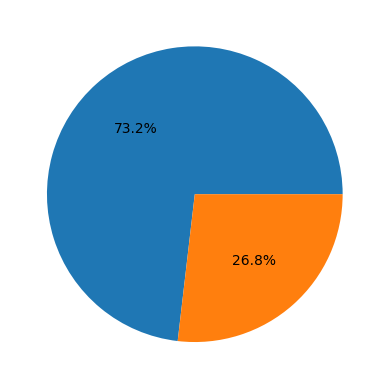

In [12]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [13]:
ints = []
objects = []
floats = []
 
for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

In [14]:
ints.remove('Class/ASD')

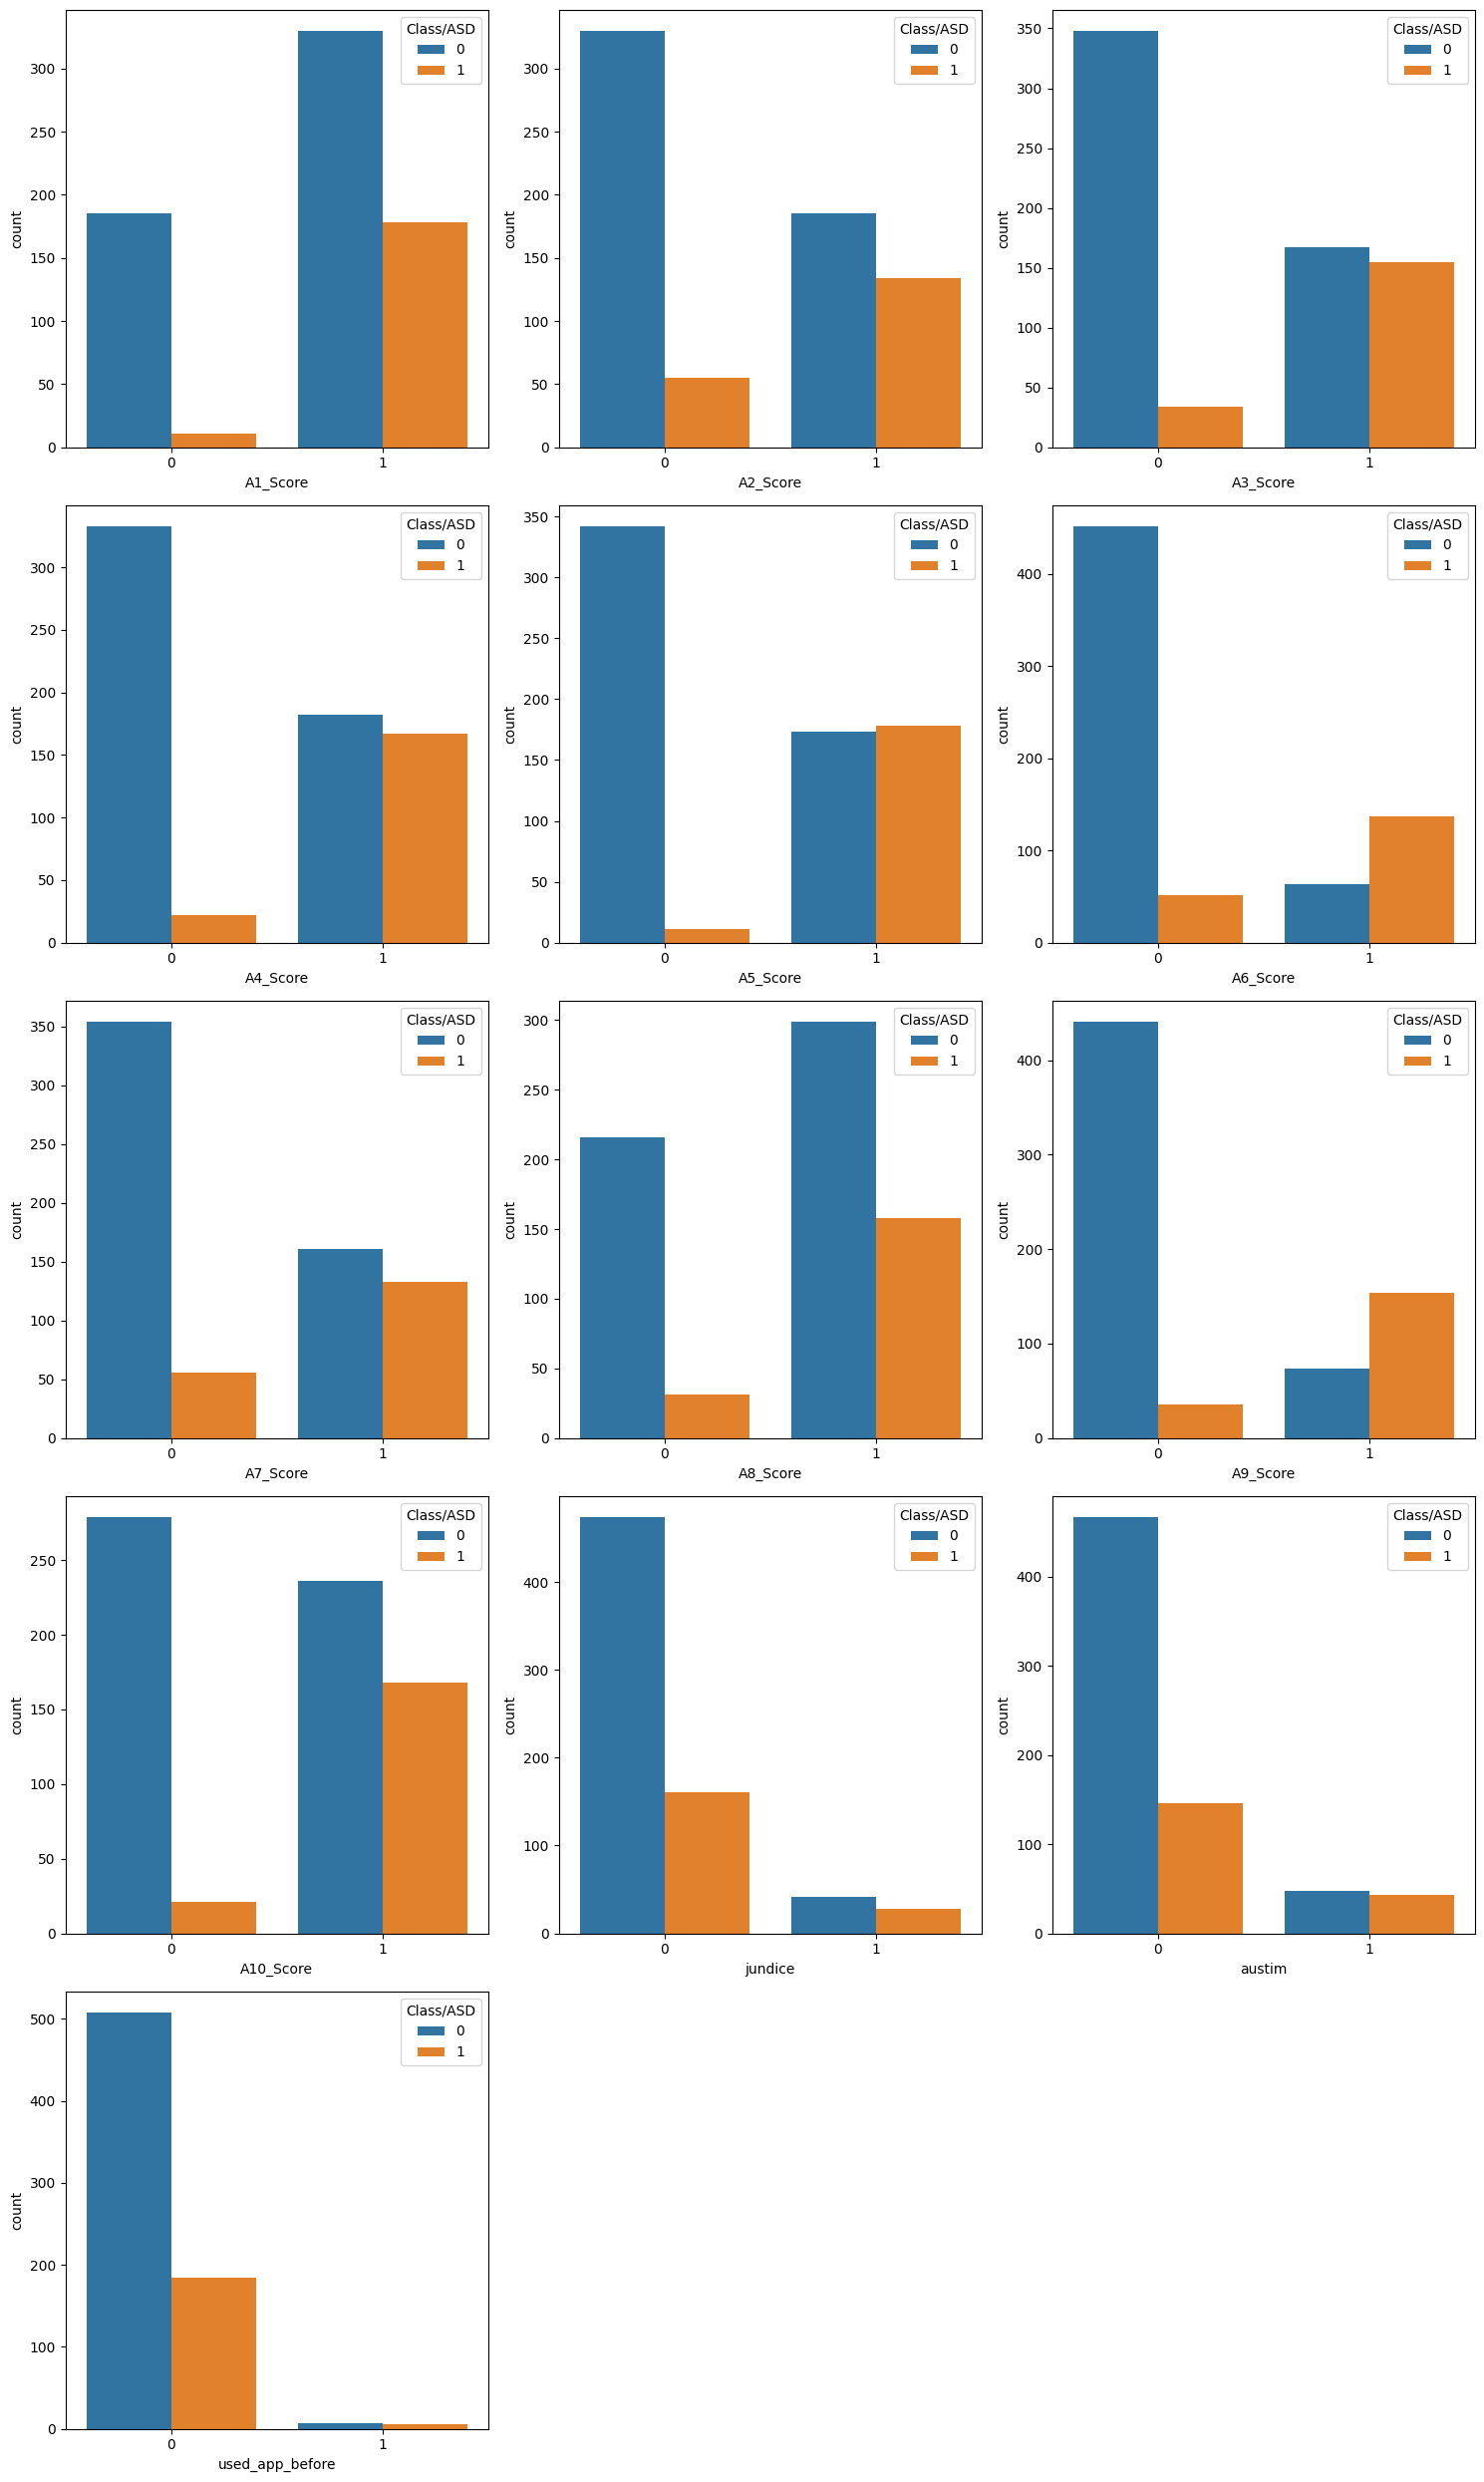

In [15]:
num_subplots = len(ints)
# Define the grid layout
# You can customize the number of rows and columns based on the number of subplots
num_rows = int((num_subplots - 1) // 3) + 1  # Calculate the number of rows needed for the subplots
num_cols = 3  # Maintain the columns as 3
# Create subplots with the specified grid layout
plt.subplots(figsize=(15, num_rows * 5))
# Iterate over each column in 'ints' list
for i, col in enumerate(ints):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot for each iteration
    # Use countplot with 'x' and 'hue' parameters
    sb.countplot(x=col, hue='Class/ASD', data=df)
plt.tight_layout()  # Adjust layout for the subplots
plt.show()  # Display the plot

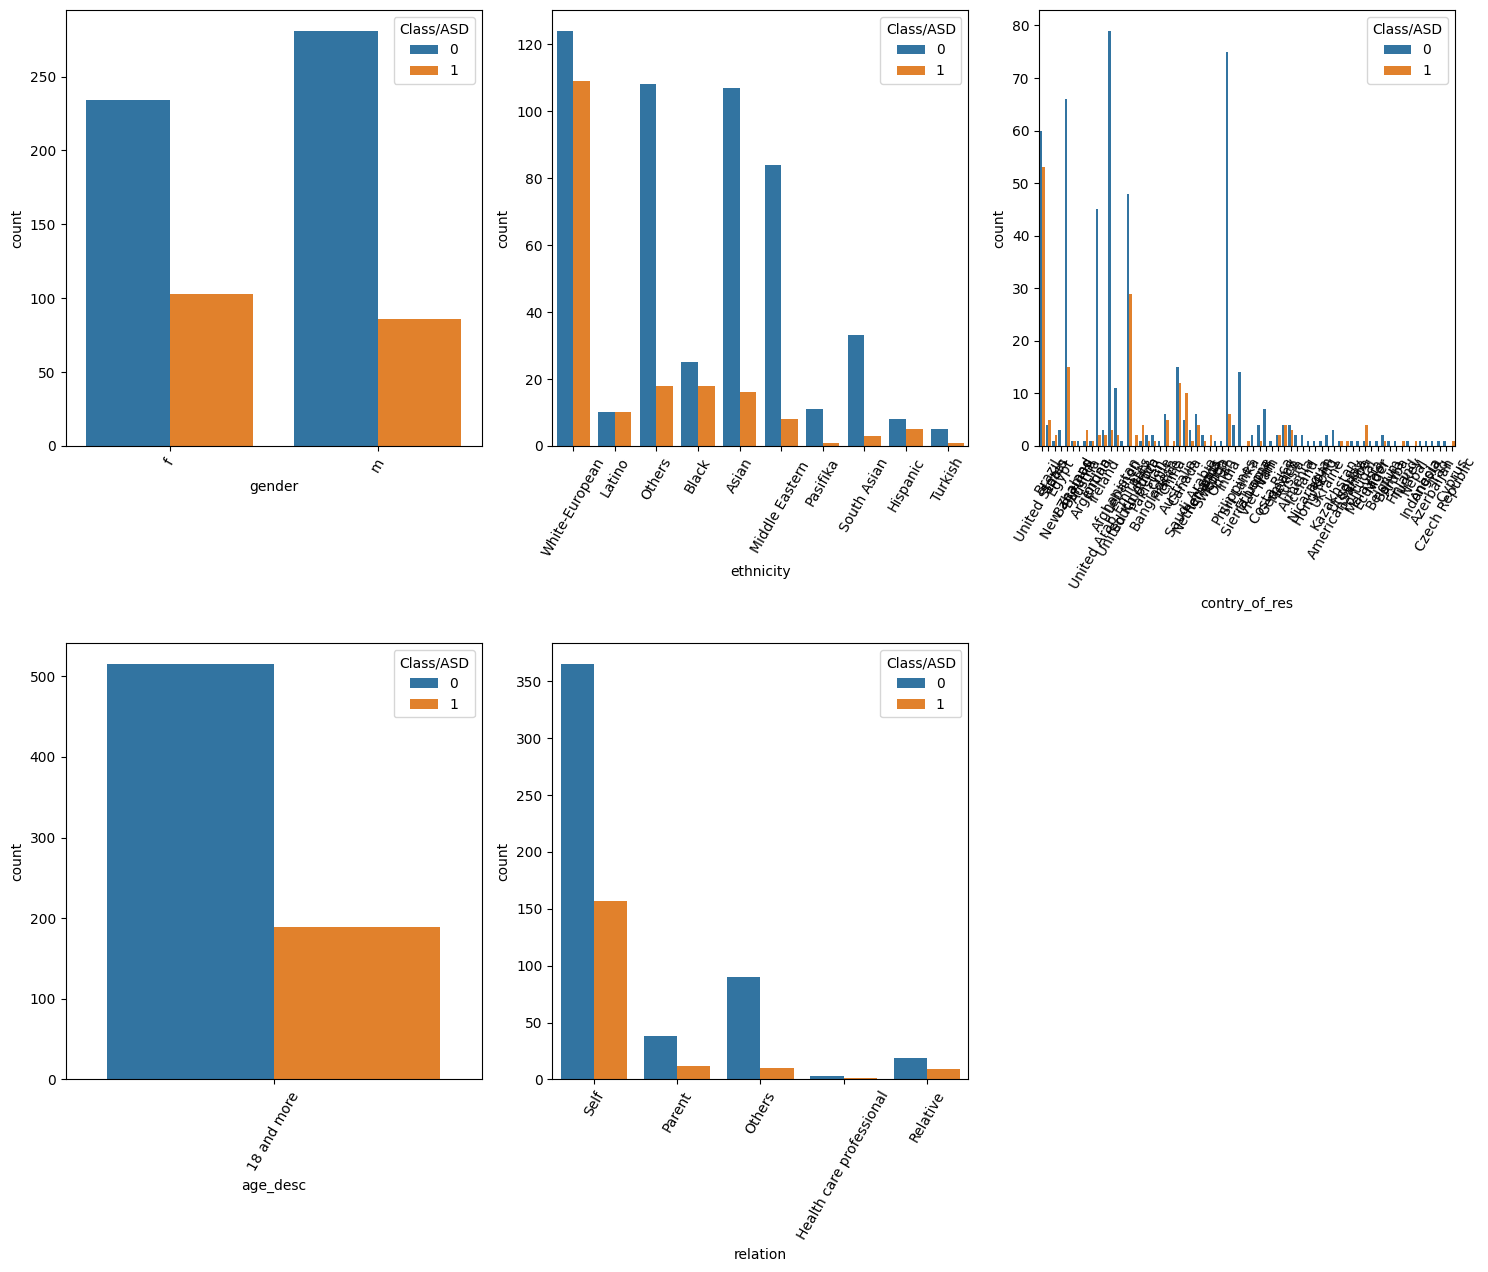

In [16]:
plt.subplots(figsize=(15, 30))
 
for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    sb.countplot(x=col, hue=df['Class/ASD'], data = df)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

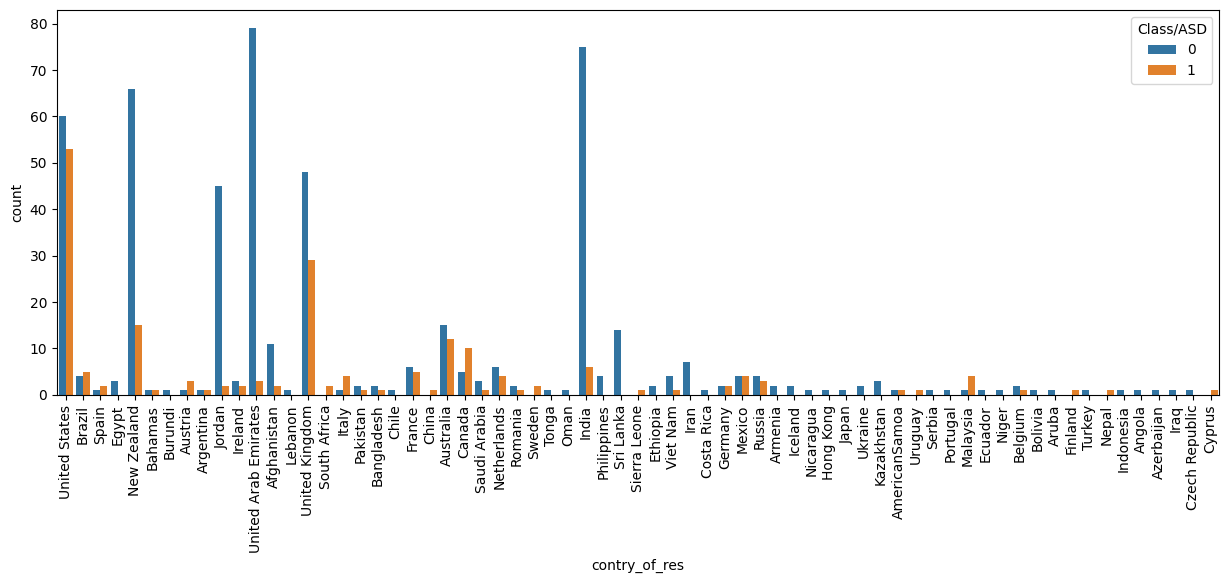

In [17]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x=df['contry_of_res'], hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

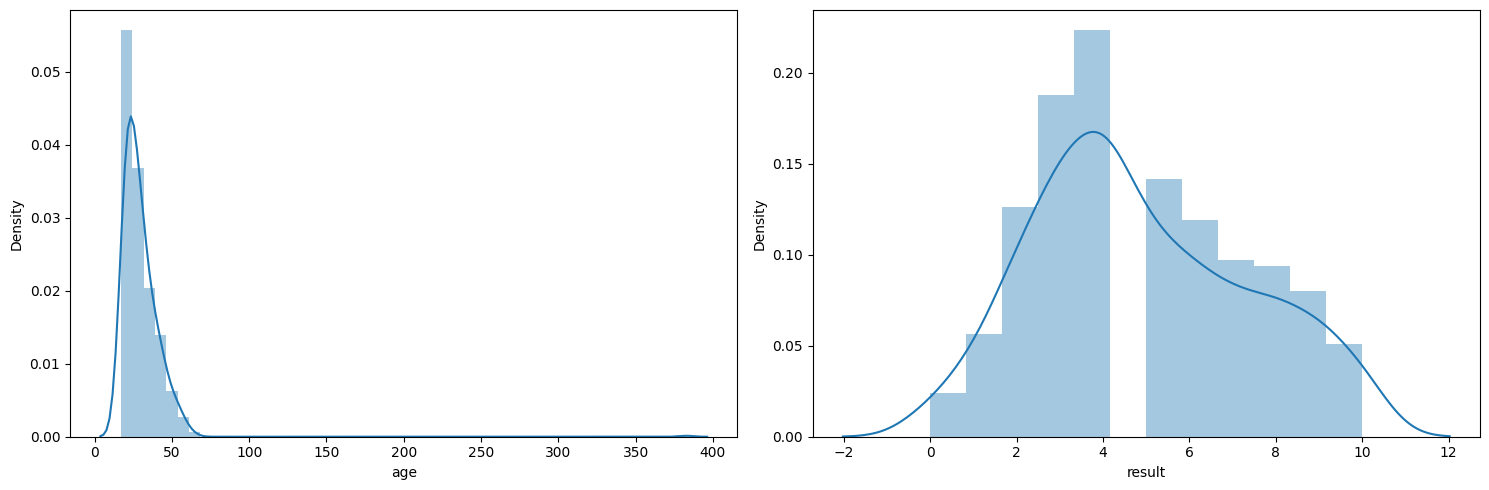

In [18]:
plt.subplots(figsize=(15,5))
 
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

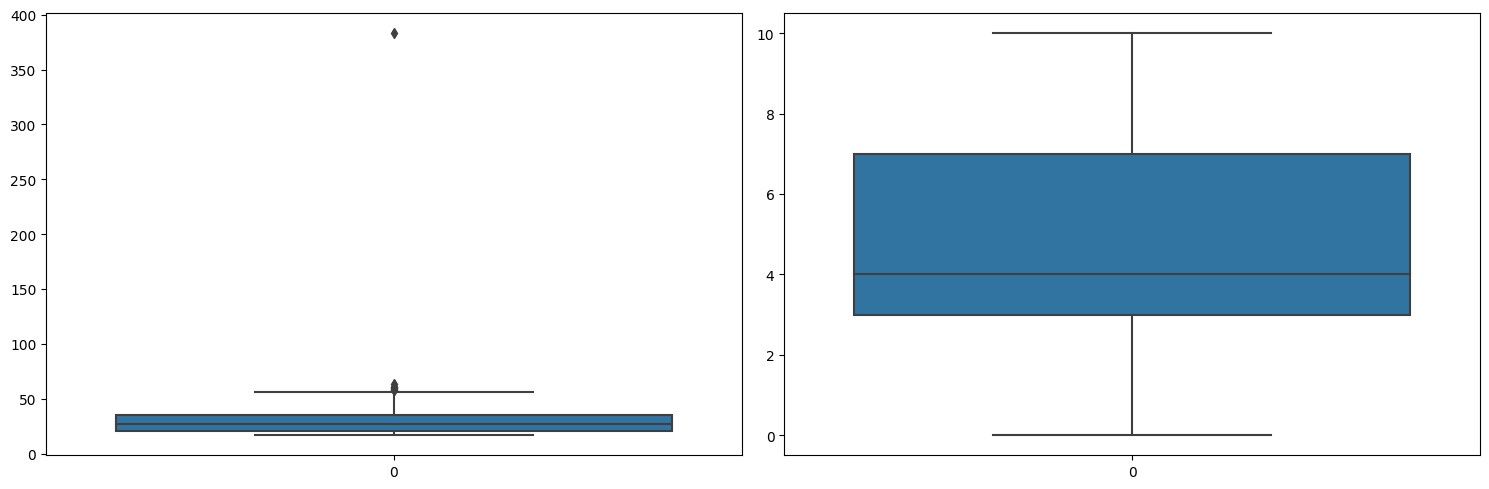

In [19]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [20]:
df = df[df['result']>-5]
df.shape

(704, 21)

In [21]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

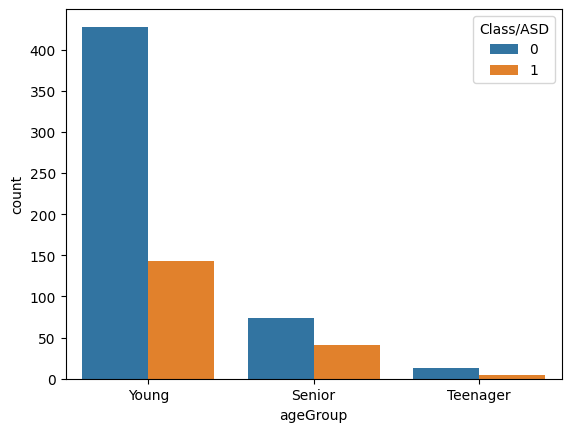

In [22]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [23]:
def add_feature(data):
  # Creating a column with all values zero
    data['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
    # Updating the 'sum_score' value with scores
    # from A1 to A10
        data['sum_score'] += data[col]
  # Creating a random data using the below three columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']
    return data
df = add_feature(df)

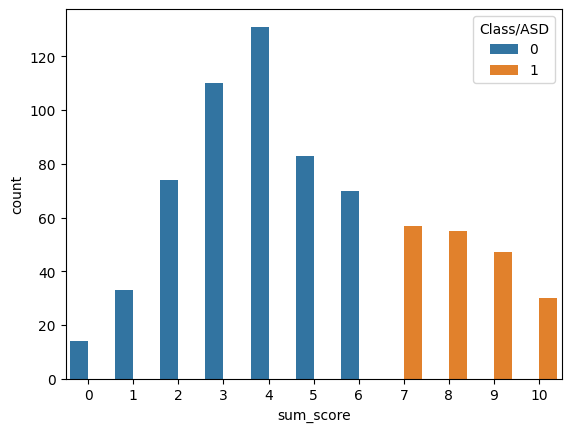

In [24]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [25]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

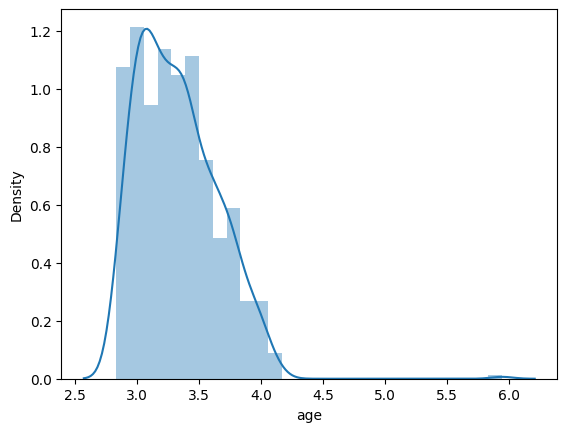

In [26]:
sb.distplot(df['age'])
plt.show()

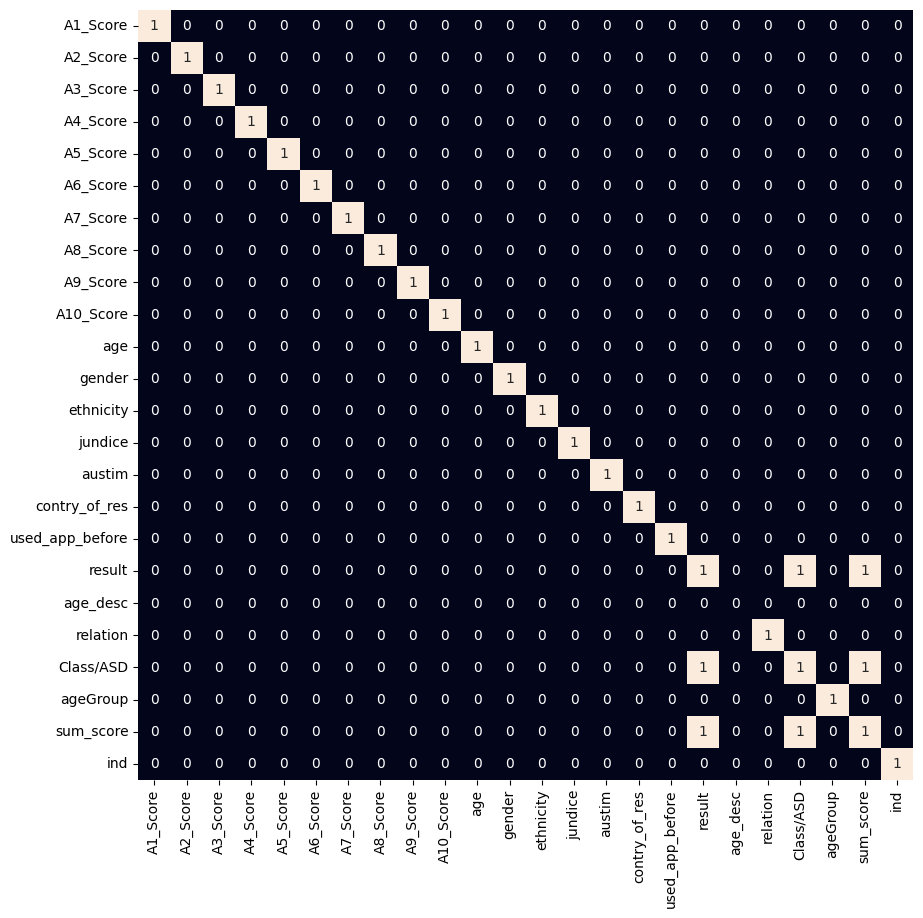

In [27]:
def encode_labels(data):
    for col in data.columns:
        # Here we will check if datatype
        # is object then we will encode it
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col]) 
    return data
df = encode_labels(df)
# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

# Model Training

In [28]:
removal = ['age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [29]:

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((820, 20), (820,))

In [30]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [31]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
 
for i in range(3):
    models[i].fit(X, Y)
    print(f'{models[i]} : ')
    train_preds = models[i].predict_proba(X) 
    print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))
    val_preds = models[i].predict_proba(X_val) 
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC(probability=True) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9992063492063492



# Model Evaluation

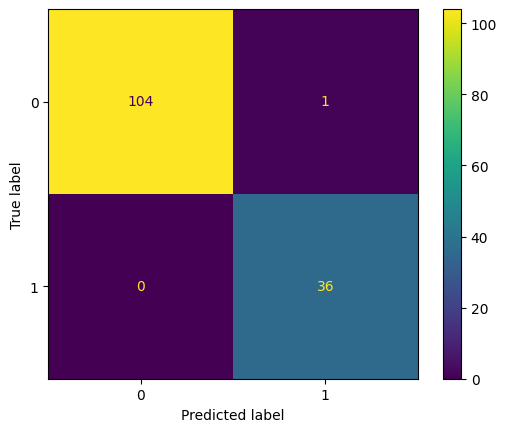

In [32]:
# metrics.plot_confusion_matrix(models[2], X_val, Y_val) # this has become invalid in current verson
# plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_val, models[2].predict(X_val))
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Plot the confusion matrix
disp.plot()
# Show the plot
plt.show()

Our Model Performed Well!